In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB, GaussianNB, BernoulliNB, CategoricalNB



Importing the train and test sets and separating their final weight.

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
x_train = train.drop(columns = ['Income', 'Final Weight'])
y_train = train['Income']

final_weight_test = test["Final Weight"]
x_test = test.drop(columns = ['Income', 'Final Weight'])
y_test = test['Income']


<h1>Bayes Learning</h1>

<h2>Gaussian Naive Bayes</h2>

Making the model.

In [3]:
model_gaussian = GaussianNB()

model_gaussian.fit(x_train, y_train)

GaussianNB()

<h3>Testing Set</h3>

Predicting output of Income on testing set.

In [4]:
y_pred_gaussian = model_gaussian.predict(x_test)

Making a confusion matrix for test set.

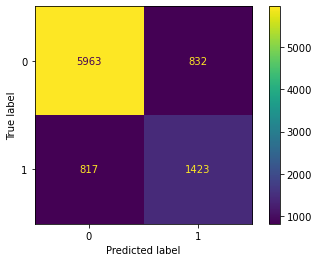

In [5]:
plot_confusion_matrix(model_gaussian, x_test, y_test) 
plt.show()

Classification Report:

In [6]:
print(classification_report(y_test,y_pred_gaussian))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6795
           1       0.63      0.64      0.63      2240

    accuracy                           0.82      9035
   macro avg       0.76      0.76      0.76      9035
weighted avg       0.82      0.82      0.82      9035



<h2>Multinomial Naive Bayes</h2>

Making the model.

In [7]:
model_multinomial = MultinomialNB()
model_multinomial.fit(x_train, y_train)

MultinomialNB()

Predicting output of Income on testing set.

In [8]:
y_pred_multinomial = model_multinomial.predict(x_test)

Making a confusion matrix.

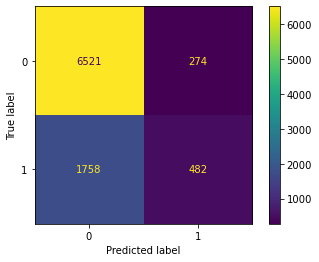

In [9]:
plot_confusion_matrix(model_multinomial, x_test, y_test) 
plt.show()

Making a classification report.

In [10]:
print(classification_report(y_test,y_pred_multinomial))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      6795
           1       0.64      0.22      0.32      2240

    accuracy                           0.78      9035
   macro avg       0.71      0.59      0.59      9035
weighted avg       0.75      0.78      0.73      9035



<h2>ComplementNB</h2>

Making a model.


In [11]:
#account for smoothing
model_complement = ComplementNB()

model_complement.fit(x_train, y_train)


ComplementNB()

Predicting output of Income on testing set.

In [12]:
y_pred_complement = model_complement.predict(x_test)

Making a confusion matrix

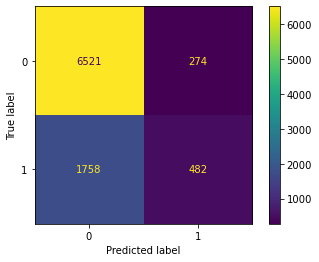

In [13]:
plot_confusion_matrix(model_complement, x_test, y_test) 
plt.show()

In [14]:
print(classification_report(y_test,y_pred_complement))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      6795
           1       0.64      0.22      0.32      2240

    accuracy                           0.78      9035
   macro avg       0.71      0.59      0.59      9035
weighted avg       0.75      0.78      0.73      9035



<h2>Bernoulli Naive Bayes</h2>

Making the model.

In [15]:
model_bernoulli = BernoulliNB()
model_bernoulli.fit(x_train, y_train)

BernoulliNB()

<h3>Testing Set</h3>

Predicting output of Income on testing set.

In [16]:
y_pred_bernoulli = model_bernoulli.predict(x_test)

Making a confusion matrix.

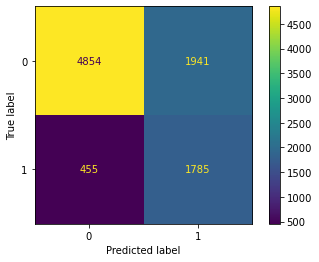

In [17]:
plot_confusion_matrix(model_bernoulli, x_test, y_test) 
plt.show()

Making a classification report.

In [18]:
print(classification_report(y_test,y_pred_bernoulli))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      6795
           1       0.48      0.80      0.60      2240

    accuracy                           0.73      9035
   macro avg       0.70      0.76      0.70      9035
weighted avg       0.81      0.73      0.75      9035



<h2>Categorical Naive Bayes</h2>

Making the model.

In [19]:
model_categorical = CategoricalNB()
model_categorical.fit(x_train, y_train)

CategoricalNB()

<h3>Testing Set</h3>

Predicting output of Income on testing set.

In [20]:
y_pred_categorical = model_categorical.predict(x_test)

Making a confusion matrix.

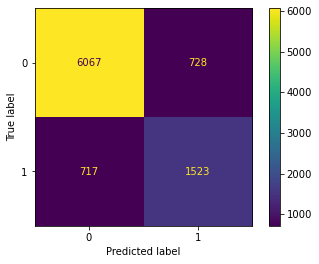

In [21]:
plot_confusion_matrix(model_categorical, x_test, y_test) 
plt.show()

Making a classification report.

In [22]:
print(classification_report(y_test,y_pred_categorical))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6795
           1       0.68      0.68      0.68      2240

    accuracy                           0.84      9035
   macro avg       0.79      0.79      0.79      9035
weighted avg       0.84      0.84      0.84      9035



<h2>Conclusion</h2>

Plotting f-1 scores for the minority class to evaluate the perfomance of each NB classifier. 

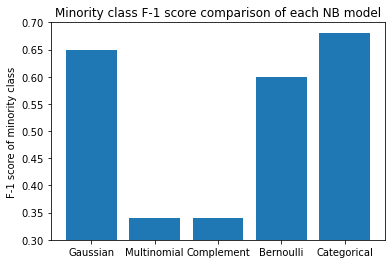

In [23]:
leaners = ['Gaussian','Multinomial','Complement','Bernoulli', 'Categorical']
f1_score = [0.65,0.34,0.34,0.6,0.68]

plt.bar(leaners, f1_score)
plt.title('Minority class F-1 score comparison of each NB model')
plt.ylabel('F-1 score of minority class')
plt.ylim(0.3,0.7)
plt.show()


<b>As the Categorical NB model produced the best f1-score in the classification report for the minority class (income > 50k), we are going to evaluate the performance of the algorithm further by taking the final weight o each row into account.</b>

Creating a function that returns a classification report on the minority class with taking the weight of each row into account in order to produce a more accurate classification report. 

In [24]:
#precision = true_positive / (true_positive + false_positive)
#Recall = true_positive / (true_positive + false_negative)
#f1= (2 * precision * recall) / (precision + recall)

def calculate_weighted_classification(final_weight, y_pred_income, y_actual):
    df = pd.DataFrame(final_weight)
    df["Predicted_Income"] = y_pred_income
    df["Actual_Income"] = y_actual
    true_positive = 0
    false_negatives = 0
    false_positive = 0
    for i in range(len(df)):
        actual_income = df.loc[i, "Actual_Income"]
        predicted_income = df.loc[i, "Predicted_Income"]
        final_weight = df.loc[i, "Final Weight"]
        if actual_income == 1 and predicted_income == 1:
            true_positive += final_weight
        elif actual_income == 1 and predicted_income == 0:
            false_negatives += final_weight
        elif actual_income == 0 and predicted_income == 1:
            false_positive += final_weight
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negatives)
    f1= (2 * precision * recall) / (precision + recall)
    return precision, recall, f1

Calling the weighted classification function with the Categorical NB model.

In [25]:
precision, recall, f1 = calculate_weighted_classification(final_weight_test, y_pred_categorical, y_test)
print(f"Weighted Precision: {precision}")
print(f"Weighted Recall: {recall}")
print(f"Weighted F1 Score: {f1}")

Weighted Precision: 0.6966371586663492
Weighted Recall: 0.6714933624648347
Weighted F1 Score: 0.6838342115254388


As you can see, the precision and f-1 scores have slightly improved after accounting for the weights of each case classified.

Exporting the model 

In [26]:
import joblib
joblib.dump(model_categorical, 'bayes.pkl', compress=9)

['bayes.pkl']